<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подсчёт-статистики-для-научной-статьи-на-python" data-toc-modified-id="Подсчёт-статистики-для-научной-статьи-на-python-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подсчёт статистики для научной статьи на python</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

## Подсчёт статистики для научной статьи на python

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# загрузка датасетов
columns = ['ФИО', 'муж', 'жен', 'возраст', 'диагноз', 'пол', 'лейкоциты_1сут', 'соэ_1сут', 'нейтрофилы_1сут', 'п/я_1сут', 'с/я_1сут', 'ТЗН1_1сут','лейкоциты_3сут','соэ_3сут', 'нейтрофилы_3сут', 'п/я_3сут', 'с/я_3сут', 'ТЗН_3сут', 'лейкоциты_6сут', 'соэ_6сут', 'нейтрофилы_6сут', 'п/я_6сут', 'с/я_6сут', 'ТЗН1_6сут', 'лейкоциты_9сут', 'со_9сут', 'нейтрофилы_9сут', 'п/я_9сут', 'с/я_9сут', 'ТЗН1_9сут', 'сК+_3сут', 'cNa+_3сут', 'cCa2+_3сут', 'cCl-_3сут', 'сК+_5сут', 'cNa+_5сут', 'cCa2+_5сут', 'cCl-_5сут', 'сК+_7сут', 'cNa+7сут', 'cCa2+7сут', 'cCl-7сут', 'pH_вен_7сут', 'pCO2mmHg_вен_7сут', 'pO2mmHg_вен_7сут', 'pH_арт_7сут', 'pCO2mmHg_арт_7сут', 'pO2mmHg_арт_7сут', 'КТ']
df = pd.read_excel('data.xlsx', names=columns)
temp = pd.read_csv('температура.csv', header = [1])
IB = pd.read_csv('IБ.csv')
IIA = pd.read_csv('IIA.csv')
IIB = pd.read_csv('IIБ.csv')
IIIA = pd.read_csv('IIIА.csv')
IIIB = pd.read_csv('IIIБ.csv') 

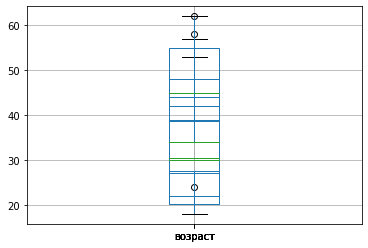

In [3]:
# выгрузка статистики в excel, боксплоты для иллюстраций к статье
IB.describe().to_excel('./IB.xlsx')
IB.boxplot(column = 'возраст')
plt.savefig('IB.png')
IIA.describe().to_excel('./IIA.xlsx')
IIA.boxplot(column = 'возраст')
plt.savefig('IIA.png')
IIB.describe().to_excel('./IIB.xlsx')
IIB.boxplot(column = 'возраст')
plt.savefig('IIB.png')
IIIA.describe().to_excel('./IIIA.xlsx')
IIIA.boxplot(column = 'возраст')
plt.savefig('IIIA.png')
IIIB.describe().to_excel('./IIIB.xlsx')
IIIB.boxplot(column = 'возраст')
plt.savefig('IIIB.png')

In [4]:
#temp['Д1'] = temp['Д1'].astype(float)
# значения температуры тела разделены запятой, а не точкой
temp_cols = list(temp.columns)
temp_cols = temp_cols[5:45]
def comma_to_point(val):
    val = str(val)
    val = val.replace(',', '.')
    if val == 'nan':
        return None
    return val
for col in temp_cols:
    temp[col] = temp[col].apply(comma_to_point)


def obratno(val):
    if val == 'None' or val is None:
        return None
    else:
        val = float(val)
        return val
    
for col in temp_cols:
    temp[col] = temp[col].apply(obratno)    
#temp
temp_describe = temp.describe()
del temp_describe['Unnamed: 0'] 
display(temp_describe)
temp_describe.to_excel('./temp_describe.xlsx') #выгрузка готовой таблицы со статистикой

,№,возраст,Д1,Д2,Д3,Д4,Д5,Д6,Д7,Д8,...,Д7.2,Д8.2,Д9.2,Д10.2,Д11.2,Д12.2,Д13.2,Д14,Unnamed: 45,Unnamed: 46
count,42.000000,42.000000,23.000000,23.000000,28.000000,43.000000,43.000000,43.000000,43.000000,43.000000,...,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,0.0,0.0
mean,21.500000,38.095238,33.659130,33.886522,35.662857,36.616744,36.397674,36.319070,35.888140,35.197674,...,37.438140,37.228605,37.788140,38.371395,37.859535,37.507209,37.438140,37.228605,NaN,NaN
std,12.267844,13.116382,0.263989,0.359667,1.292184,0.959146,0.219836,0.290515,0.196642,0.342601,...,0.072218,0.140214,0.503418,0.579526,0.468056,0.157953,0.072218,0.140214,NaN,NaN
min,1.000000,20.000000,33.300000,33.500000,34.100000,34.500000,36.100000,35.800000,35.600000,34.700000,...,37.200000,36.900000,37.200000,37.500000,37.400000,37.400000,37.200000,36.900000,NaN,NaN
25%,11.250000,27.250000,33.450000,33.600000,34.200000,36.710000,36.300000,36.100000,35.800000,34.800000,...,37.400000,37.200000,37.500000,37.800000,37.500000,37.400000,37.400000,37.200000,NaN,NaN
50%,21.500000,36.000000,33.600000,33.890000,35.800000,37.000000,36.400000,36.300000,35.900000,35.200000,...,37.440000,37.200000,37.700000,38.400000,37.700000,37.400000,37.440000,37.200000,NaN,NaN
75%,31.750000,46.750000,33.900000,34.200000,37.125000,37.200000,36.400000,36.600000,35.900000,35.400000,...,37.500000,37.300000,38.050000,38.900000,37.900000,37.555000,37.500000,37.300000,NaN,NaN
max,42.000000,64.000000,34.100000,34.500000,37.400000,37.600000,36.800000,36.800000,36.800000,36.000000,...,37.500000,37.500000,38.800000,39.600000,39.100000,38.000000,37.500000,37.500000,NaN,NaN


In [5]:
temp_cols.insert(0, 'возраст')
temp_cols.insert(0,'№')
row = {}
keys = [temp_cols]
for col in temp_cols:
    row[col] = temp[col].median()
median_another = pd.DataFrame([row])
median_another.to_excel('./медианы отдельно.xlsx')
median_another

,№,возраст,Д1,Д2,Д3,Д4,Д5,Д6,Д7,Д8,...,Д5.2,Д6.2,Д7.2,Д8.2,Д9.2,Д10.2,Д11.2,Д12.2,Д13.2,Д14
0,21.5,36.0,33.6,33.89,35.8,37.0,36.4,36.3,35.9,35.2,...,37.7,37.4,37.44,37.2,37.7,38.4,37.7,37.4,37.44,37.2


## Вывод
Впервые pandas пригодились для решения настоящей практической задачи.
Применен метод describe к колонке с возрастом в каждой из групп пациентов, построены боксплоты, показывающие разброс этих данных. Вычислены параметры describe для каждого из дней госпитализации. Выводов и потверждений гипотез нет, т.к. это промежуточные результаты работы.